In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io
from tqdm import tqdm
import seaborn as sns

In [3]:
# dataset path
data_root = '/home/hero/Data/heat_layout_data/200x200_0.045_0.055/complex_component/FDM'
train_list = '/home/hero/Data/heat_layout_data/train.txt'

nse_geom_path = '/home/hero/Data/heat_layout_data/200x200_0.045_0.055/nse_geom'
nse_test_geom_path = '/home/hero/Data/heat_layout_data/200x200_0.045_0.055/nse_test_geom'
nse_ref_geom_path = '/home/hero/Data/heat_layout_data/200x200_0.045_0.055/nse_ref_geom'


In [4]:
mat1 = os.listdir(data_root + '/train')[0]
mat_file = io.loadmat(data_root + '/train/' + mat1)

In [5]:
matrix = mat_file['F']
# 히트맵 그리기 함수
def plot_heatmap(matrix):
    # 히트맵 생성
    plt.figure(figsize=(10, 5))
    ax = sns.heatmap(matrix, annot=True, fmt=".0f", cmap='viridis')

    plt.show()
# 히트맵 그리기
#plot_heatmap(matrix)

In [6]:
# make geometry
'''
0: interior
1: non-slip
2: inlet
3: outlet
'''

'\n0: interior\n1: non-slip\n2: inlet\n3: outlet\n'

In [7]:
mat_file['F'].shape

(200, 200)

In [8]:
geom = np.ones([16,32])
geom.shape

geom[5,20:23] = 0
geom[6,19:22] = 0
geom[7,18:21] = 0
geom[8,16:20] = 0
geom[9,17:19] = 0

geom[0,:] = 0
geom[-1,:] = 0

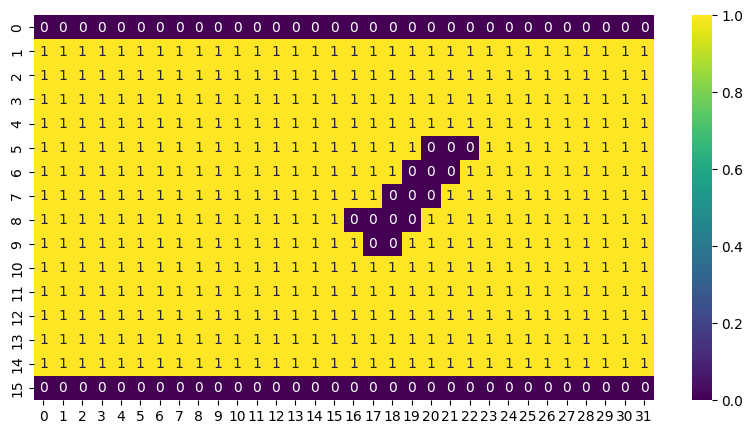

In [9]:
plot_heatmap(geom)

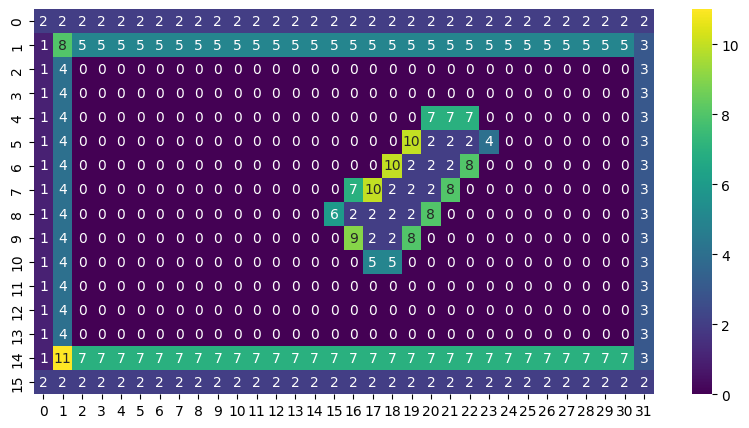

In [10]:
boundary = np.zeros_like(geom)
boundary[np.where(geom==0)] = 2
boundary[1:-1,0] = 1 # inlet
boundary[1:-1,-1] = 3 # outlet
boundary[1:-1,1] = 4
boundary[1,1:-1] = 5
boundary[-2,1:-1] = 7
boundary[1,1] = 8
boundary[-2,1] = 11

# near obstacle
boundary[4,20:23] = 7
boundary[5,19] = 10
boundary[5,23] = 4
boundary[6,18] = 10
boundary[6,22] = 8
boundary[7,16] = 7
boundary[7,17] = 10
boundary[7,21] = 8
boundary[8,15] = 6
boundary[8,20] = 8
boundary[9,16] = 9
boundary[9,19] = 8
boundary[10,17:19] = 5


plot_heatmap(boundary)

In [11]:
# save mat
mat_file['F'] = np.stack([geom.astype('int16'),boundary.astype('int16')])
mat_file['u'] = np.stack([boundary.astype('int16'),boundary.astype('int16'),boundary.astype('int16')])

In [12]:
mat_file['F'].shape, mat_file['u'].shape

((2, 16, 32), (3, 16, 32))

In [13]:
for i in range(10000):
    io.savemat(nse_ref_geom_path + '/train/' + 'nse_ref_' + str(i) + '.mat',mat_file)